Load in Data

In [4]:
from openclean.data.source.socrata import Socrata
import gzip
import humanfriendly
import os

dataset = Socrata().dataset('k397-673e')
datafile = './k397-673e.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)
        
fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

from openclean.pipeline import stream
from openclean.data.load import dataset
import pandas as pd

ds = stream(datafile)
ds_full = dataset(datafile)

Using 'Citywide Payroll Data (Fiscal Year)' in file ./k397-673e.tsv.gz of size 89.62 MB


Print all rows

In [5]:
ds_full.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00


In [6]:
COLUMNS = [
    "Payroll Number",
    "Agency Name",
    "Last Name",
    "First Name",
    "Mid Init",
    "Agency Start Date"
]

In [ ]:
##Find missing data & check data type

In [7]:
from openclean.profiling.column import DefaultColumnProfiler
from openclean.profiling.dataset import dataset_profile

#profiles = ds.profile(default_profiler=DefaultColumnProfiler)
profiles = dataset_profile(ds_full)


In [8]:
print(profiles.stats())

                              total    empty  distinct  uniqueness    entropy
Fiscal Year                 3923290        0         7    0.000002   2.805614
Payroll Number              3923290  1745440       157    0.000072   4.286506
Agency Name                 3923290        0       165    0.000042   4.365925
Last Name                   3923290     2031    157080    0.040059  14.264455
First Name                  3923290     2033     88232    0.022501  11.611521
Mid Init                    3923290  1596166        43    0.000018   4.073274
Agency Start Date           3923290       63     14933    0.003806  11.097847
Work Location Borough       3923290   506226        22    0.000006   1.507244
Title Description           3923290       84      1802    0.000459   6.207524
Leave Status as of June 30  3923290        0         5    0.000001   0.710495
Base Salary                 3923290        0     98573    0.025125  10.224240
Pay Basis                   3923290        0         4    0.0000

In [9]:
print(profiles.types())

                             date    float   int     str
Fiscal Year                     0        0     7       0
Payroll Number                  0        0   157       0
Agency Name                     0        0     0     165
Last Name                       0        1     1  157078
First Name                      0        2     0   88230
Mid Init                        0        0     9      34
Agency Start Date           14933        0     0       0
Work Location Borough           0        0     0      22
Title Description               0        0     0    1802
Leave Status as of June 30      0        0     0       5
Base Salary                     0    98573     0       0
Pay Basis                       0        0     0       4
Regular Hours                   0    83708  2393       0
Regular Gross Paid              0  1785527     0       0
OT Hours                        0    51067  1552       0
Total OT Paid                   0   806992     0       0
Total Other Pay                

In [ ]:
##Data Profiling for "Agency Name" Column

In [10]:
agency = ds.distinct('Agency Name')
for rank, val in enumerate(agency.most_common()):
    st, freq = val
    print(f'{rank + 1:<3} {st}  {freq:>10,}')

1   DEPT OF ED PEDAGOGICAL     758,360
2   DEPT OF ED PER SESSION TEACHER     608,565
3   POLICE DEPARTMENT     367,745
4   DEPT OF ED PARA PROFESSIONALS     245,259
5   BOARD OF ELECTION POLL WORKERS     235,235
6   DEPT OF ED HRLY SUPPORT STAFF     164,165
7   FIRE DEPARTMENT     128,819
8   DEPT OF PARKS & RECREATION     117,212
9   DEPARTMENT OF EDUCATION ADMIN     110,936
10  HRA/DEPT OF SOCIAL SERVICES     104,331
11  NYC HOUSING AUTHORITY      95,132
12  DEPARTMENT OF SANITATION      92,755
13  DEPARTMENT OF CORRECTION      91,843
14  DEPT OF ED PER DIEM TEACHERS      90,784
15  Police Department      55,619
16  DEPT OF HEALTH/MENTAL HYGIENE      54,291
17  ADMIN FOR CHILDREN'S SVCS      53,268
18  DEPT OF ENVIRONMENT PROTECTION      48,751
19  DEPARTMENT OF TRANSPORTATION      42,801
20  COMMUNITY COLLEGE (MANHATTAN)      41,594
21  COMMUNITY COLLEGE (LAGUARDIA)      32,068
22  COMMUNITY COLLEGE (KINGSBORO)      31,582
23  COMMUNITY COLLEGE (QUEENSBORO)      26,474
24  COMMUNIT

In [ ]:
##Data profiling for "Last Name and First Name" Columns

For data cleaning, we filled the empty value in "Last Name and First Name" by "/"

In [11]:
from openclean.function.value.null import is_empty
from openclean.operator.transform.update import update
ds_full = update(ds_full, columns='Last Name', func=str.upper)
ds_full = update(ds_full, columns='Last Name', func=lambda x: '/' if is_empty(x) else x)
last_name = ds_full['Last Name'].value_counts()

print(last_name)

ds_full = update(ds_full, columns='First Name', func=str.upper)
ds_full = update(ds_full, columns='First Name', func=lambda x: '/' if is_empty(x) else x)
first_name = ds_full['First Name'].value_counts()

print(first_name)


RODRIGUEZ         24912
WILLIAMS          24338
SMITH             19442
BROWN             18617
JOHNSON           18421
                  ...  
LILJEGREN             1
POLON                 1
SKEIST                1
SHET                  1
NUNEZ TRINIDAD        1
Name: Last Name, Length: 157079, dtype: int64
MICHAEL     60512
JOHN        39634
JOSEPH      33445
ROBERT      32363
MARIA       31386
            ...  
AYELIH          1
RAMONIA         1
SHYIESHA        1
ADANTA          1
ZABA            1
Name: First Name, Length: 88232, dtype: int64


In [ ]:
##Columns "Last Name" and "First Name" key collision Strategy

In [12]:
from openclean.cluster.key import KeyCollision
from openclean.function.value.key.fingerprint import Fingerprint

last_names = stream(datafile).update('Last Name', str.upper).distinct('Last Name')
clusters = KeyCollision(func=Fingerprint()).clusters(last_names)
first_names = stream(datafile).update('First Name', str.upper).distinct('First Name')
clusters = KeyCollision(func=Fingerprint()).clusters(first_names)

In [13]:
def print_k_clusters(clusters, k=5):
    clusters = sorted(clusters, key=lambda x: len(x), reverse=True)
    val_count = sum([len(c) for c in clusters])
    print('Total number of clusters is {} with {} values'.format(len(clusters), val_count))
    for i in range(min(k, len(clusters))):
        print('\nCluster {}'.format(i + 1))
        for key, cnt in clusters[i].items():
            if key == '':
                key = "''"
            print(f'  {key} (x {cnt})')
print_k_clusters(clusters)

Total number of clusters is 875 with 1771 values

Cluster 1
  ANN MARIE (x 1395)
  MARIE ANN (x 7)
  ANN  MARIE (x 5)
  ANN- MARIE (x 3)

Cluster 2
  M A (x 7)
  A M (x 2)
  A .M. (x 2)

Cluster 3
  ANNE MARIE (x 499)
  MARIE ANNE (x 17)
  ANNE - MARIE (x 1)

Cluster 4
  DAN (x 387)
  DAN DAN (x 17)
  D'AN (x 2)

Cluster 5
  DASHA (x 40)
  DA'SHA (x 1)
  D'ASHA (x 1)


In [ ]:
##Data profiling for column "Agency Start Date"

For our Strategy, we first identify the min and max of this column and we do the visulization of this column.

In [14]:
profiles.minmax('Agency Start Date')

,min,max
date,1901-01-01,9999-12-31 00:00:00


TypeError: log_histogram_inverse() takes 4 positional arguments but 5 were given

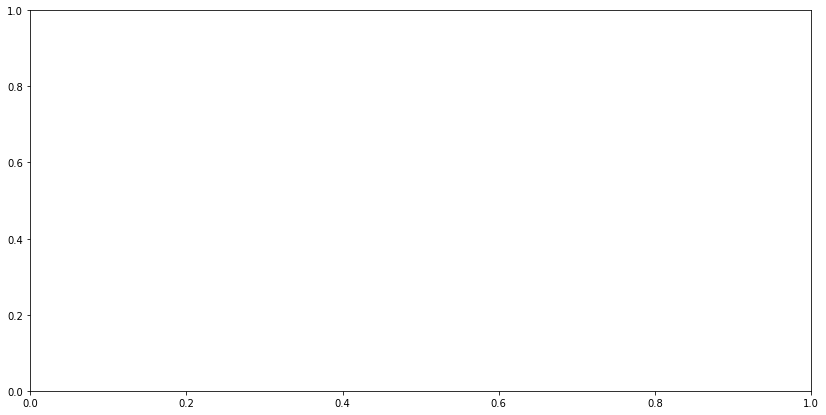

In [18]:
from openclean.function.value.null import is_empty
from openclean.operator.transform.update import update
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.boxplots(figsize=(14,7))
log_boxplot(ax, ds_full['Agency Start Date'], 'Agency Start Date', 'green')
